In [1]:
# Based on figure 3 of "Bayesian workflow",
# https://arxiv.org/abs/2011.01808

# Code is modified from Osvaldo Martin et al,
# "Bayesian Modeling and Comptuation In Python"
# https://github.com/aloctavodia/BMCP/blob/master/Code/chp_01bis/chp_01bis_prior_posterior_checks.ipynb

# The use of Cauchy priors for logistic regression coefficients is discussed in
# https://arxiv.org/abs/1507.07170

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
import numpy as np

np.set_printoptions(precision=3)
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats
from scipy.special import expit

try:
    import arviz as az
except ModuleNotFoundError:
    %pip install -qq arviz
    import arviz as az

from sklearn.preprocessing import StandardScaler

In [2]:
pml.latexify(width_scale_factor=2, fig_height=1.5)

/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


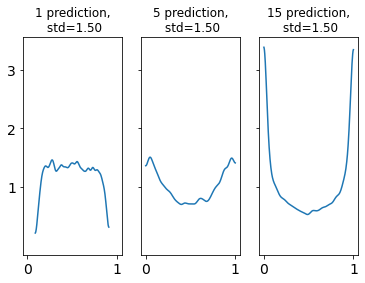

In [3]:
def make_plot_panel(dims, sigmas, student_prior=False, standardize=False):
    N = len(dims)
    fig, axes = plt.subplots(1, N, sharex=True, sharey=True)
    axes = np.ravel(axes)
    np.random.seed(0)
    nbetas = 10000  # num random parameters to try
    ndata = 500  # num. observations for each beta
    for i in range(N):
        dim = dims[i]
        ax = axes[i]
        sigma = sigmas[i]
        if student_prior:
            df = 3  # 1=Cauchy
            prior = stats.t(df, 0, sigma)
        else:
            prior = stats.norm(0, sigma)
        β = prior.rvs((nbetas, dim))
        X = np.random.binomial(n=1, p=0.8, size=(dim, ndata))
        # X = stats.norm(0, 1).rvs((dim, ndata))
        if standardize:
            # X = 2*X - 1 # map from [0,1] to [-1,1]
            # X = X*0.5 # map to [-0.5, 0.5]
            scaler = StandardScaler()
            X = scaler.fit_transform(X.T).T
        ys = np.random.binomial(n=1, p=expit(β @ X))  # size nbetas * ndata
        az.plot_kde(ys.mean(1), ax=ax)  # mean over ndata, kde over nbetas
        if student_prior:
            ax.set_title("{:d} prediction, std={:0.2f},\n student prior".format(dim, sigma))
        else:
            ax.set_title("{:d} prediction,\n std={:0.2f}".format(dim, sigma))
    axes[0].set_yticks([1, 2, 3])


dims = np.array([1, 5, 15])
sigmas = 1.5 * np.ones(3)
make_plot_panel(dims, sigmas)
pml.savefig("logreg_prior_binary_features", tight_bbox=True)